<a href="https://colab.research.google.com/github/sushii-00/MultiLayeredPerceptron-models/blob/main/MutiClassClassification_Fashion_MNIST_using_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras



In [2]:
tf.__version__

'2.5.0'

###Building an IMAGE CLASSIFIER USING THE SEQUENTIAL API

F-MNIST PROBLEM IS A BIT MORE CHALLENGING THAN THE MNIST PROBLEM BECAUSE THERE ARE MORE CLASSES HERE

In [3]:
#LOADING THE DATASET
ds = keras.datasets.fashion_mnist
(X_train_full, y_train_full) , (X_test, y_test) = ds.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

Creating a 'VALID SET'

AND WE ARE SCALING THESE FEATURES BECAUSE WE ARE USING THE GRADIENT DESCEND ALGORITHM

In [7]:
X_valid, X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/Top" , 'Trouser', 'Pullover' , 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker' , 'Bag', 'Ankle boot']

In [9]:
class_names[y_train[0]]

'Coat'

###Creating the Model Using the Sequential API

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Note that **Dense layers often have a lot of parameters.** For eg., the first hidden layer has 784X300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the **risk of overfitting** , especially when you do not have a lot of training data.

###To fetch each layer of the model:

In [14]:
model.layers

In [15]:
model.get_layer('dense_3').name

'dense_3'

In [23]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [24]:
model.get_layer(hidden1.name) is hidden1

True

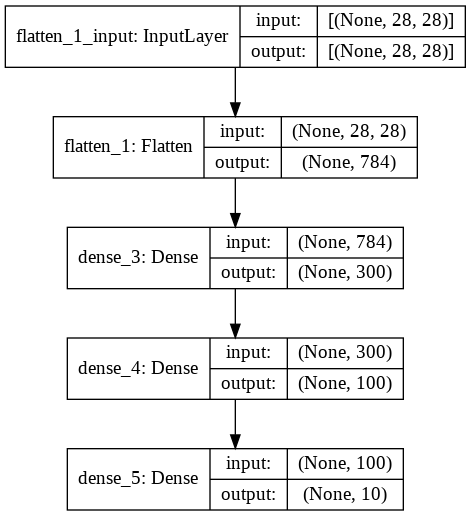

In [27]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

NameError: ignored

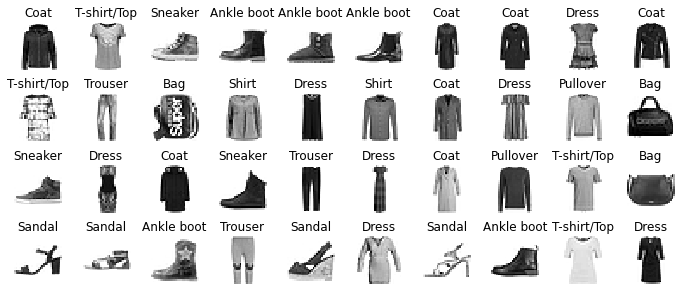

In [29]:
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [26]:
###To access the weights:
weights,biases = hidden1.get_weights()
weights

array([[ 0.04041936,  0.05280647, -0.06644195, ...,  0.01945167,
         0.06178389,  0.01031573],
       [ 0.04359102,  0.01556181,  0.02500743, ..., -0.0672899 ,
        -0.0511877 ,  0.06617332],
       [-0.04618469, -0.01846832, -0.00535823, ...,  0.05214725,
         0.05659705,  0.03313385],
       ...,
       [-0.05832393,  0.04340149,  0.06317522, ...,  0.03270748,
         0.00839923, -0.04528791],
       [-0.03601749,  0.03758513,  0.03863033, ...,  0.07124513,
        -0.01592324,  0.04284412],
       [ 0.06300975, -0.02428481, -0.06291744, ..., -0.01794595,
        -0.02712136, -0.05131254]], dtype=float32)

In [30]:
weights.shape

(784, 300)

In [31]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
biases.shape

(300,)

In [35]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics= ["accuracy"])

###Fitting the data

In [36]:
history = model.fit(X_train, y_train,epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7116 - accuracy: 0.7640 - val_loss: 0.5822 - val_accuracy: 0.7896
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4887 - accuracy: 0.8292 - val_loss: 0.4925 - val_accuracy: 0.8226
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4440 - accuracy: 0.8430 - val_loss: 0.4171 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4149 - accuracy: 0.8544 - val_loss: 0.4108 - val_accuracy: 0.8568
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3952 - accuracy: 0.8605 - val_loss: 0.3792 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3796 - accuracy: 0.8660 - val_loss: 0.3724 - val_accuracy: 0.8698
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3662 - accuracy: 0.8703 - val_loss: 0.3628 - val_accuracy:

The fit method returns a history object containing the training parameters(history.params), the list of epochs it went through(history.epoch), and most importantly a dictionary(history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set(if any). If you create a pandas dataframe using this dictionary and call its plot() method, you get the learning curves.

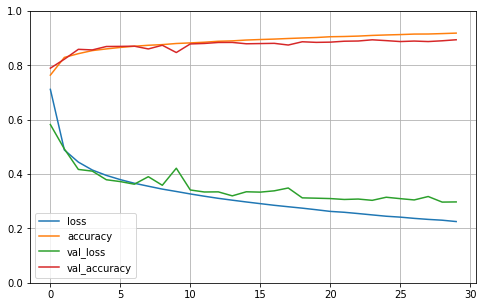

In [37]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical range to [0-1]
plt.show()

In [38]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

###Now, evaluating our model

In [40]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 66.2730 - accuracy: 0.8456


[66.27301788330078, 0.8456000089645386]

In [41]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [44]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [45]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

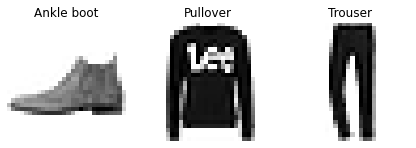

In [47]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()